LINEAR REGRESSION :

Here, we try to implement the linear regression model first on our own.

We first import the dataset we're using (California Housing Dataset)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('D:\\Program Files\\Machine Learning\\Linear Regression\\housing.csv')

# This shows which columns are missing entries in the dataset
print(data.isnull().sum())

data = data.dropna()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


From this, we can see that the available features in the dataset. Taking all features into account. Hence, taking only these features into account, and applying feature scaling to them :

In [2]:
X = data.loc[:,"housing_median_age":"median_income"]
y = data.loc[:,"median_house_value"]

noOfFeatures = len(X.columns)

X = X.to_numpy()
y = y.to_numpy()

print("number of features =",noOfFeatures)
print("Shape of X =", X.shape)
print("Shape of y =", y.shape)

maxValues = [X[:,i].max() for i in range(noOfFeatures)]
print(maxValues)

for i in range(noOfFeatures):
    X[:, i] = X[:, i] / maxValues[i]

# ymax = y.max()

# y = y / y.max()

X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of y_train =", y_train.shape)
print("Shape of y_test =", y_test.shape)

number of features = 6
Shape of X = (20433, 6)
Shape of y = (20433,)
[52.0, 39320.0, 6445.0, 35682.0, 6082.0, 15.0001]
Shape of X_train = (15324, 6)
Shape of X_test = (5109, 6)
Shape of y_train = (15324,)
Shape of y_test = (5109,)


Now, creating an ndarray for the weights of each feature, and setting learning rate :

In [3]:
w = np.array([0.0 for i in range(noOfFeatures)])
# w = np.transpose(w)

print("The set of weights initially is :", w)
print("Shape of w is :", w.shape)

b = 0.0
alpha = 0.01

m = X_train.shape[0]
print("The number of training examples is :", m)
print("The learning rate is set to :", alpha)
print("The initial value of b is :", b)

# print((np.transpose(np.dot(w, np.transpose(X_train))) + b).shape)

The set of weights initially is : [0. 0. 0. 0. 0. 0.]
Shape of w is : (6,)
The number of training examples is : 15324
The learning rate is set to : 0.01
The initial value of b is : 0.0


The function of the model is given by f, where :

    f = np.dot(w, x) + b

Also, we calculate the cost function simultaneously in order to plot it against the number of iterations to check if it has converged.

In [4]:
J = []

noOfIterations = 50000
# print(X_train)

for iteration in range(noOfIterations):
    
    f = np.dot(X_train, w) + b # This directly calculates the values of f(x) for every training example based on our current weights
    # print(f)
    
    J.append((1/2)*(np.square(np.subtract(f,y_train)).mean()))
    
    # Calculating the cost for each individual feature
    currentError = np.subtract(f, y_train)
    for i in range(noOfFeatures):
        cost = (np.multiply(currentError, X_train[:,i])).mean()
        w[i] = w[i] - (alpha*cost)


    # Calculating the b separately
    cost = (currentError).mean()
    
    # Simulataneously updating
    b = b - alpha * cost

    # print(w)
    # print(b)
    # print('next')

Thus gradient descent is calculated above. Now, inorder to check if J is converging, we plot the cost function against the number of iterations.

The set of weights is now : [106892.88052926   3122.33782048 126083.23957482 -82157.24818173
 115685.31587823 650141.18776723]
b is now : -36512.3266972322


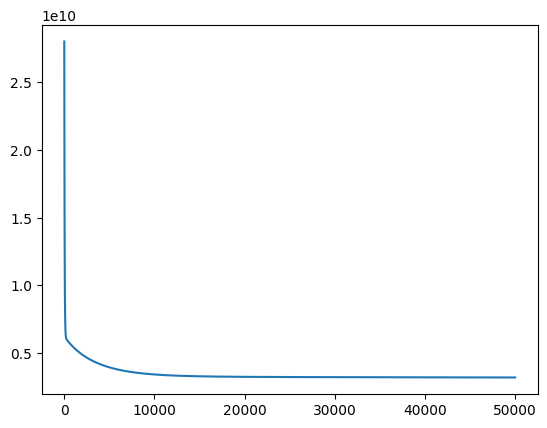

28026906382.49553
3182263442.2381573


In [5]:
print("The set of weights is now :", w)
print("b is now :", b)

iterations = [i for i in range(1, noOfIterations+1)]

plt.plot(iterations, J)
plt.show()

print(J[0])
print(J[-1])

Now, in order to calculate the mean squared error of our model

In [6]:
modelPredictions = np.dot(X_test, w) + b
# print(modelPredictions)
# print(y_test)
print(mean_absolute_error(y_test, modelPredictions))

57981.12205163976


Thus, the mean squared error of our model is about 131,000 dollars. Which is actually pretty bad